In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [213]:
ff = pd.read_csv("forestfires.csv")

In [214]:
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [215]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [216]:
ff.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [217]:
ff['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

# EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa4aad4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa4aacac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa4aaece0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa4aacca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa4aae5f0>],
 'means': []}

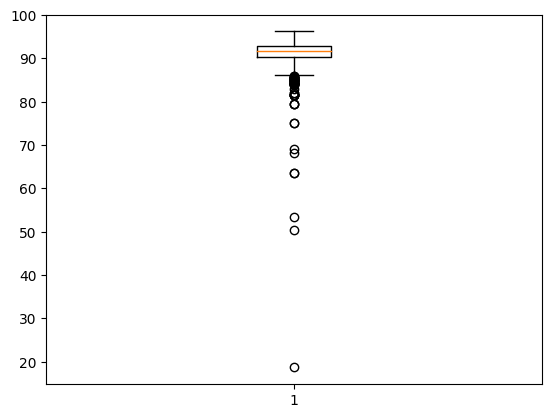

In [218]:
plt.boxplot(ff['FFMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa11b8340>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa11b9600>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa11b97e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa11b9ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa12d0310>],
 'means': []}

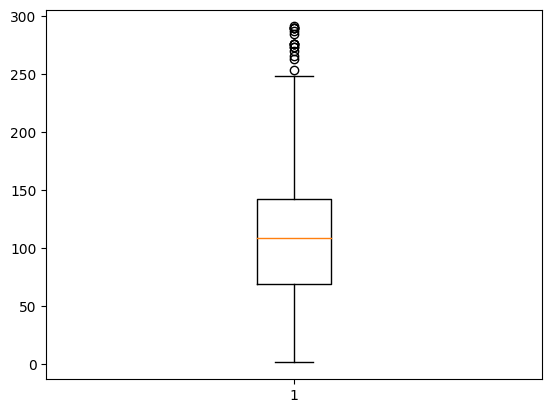

In [219]:
plt.boxplot(ff['DMC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa12884f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa1288d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa12894b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa1288e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa1288220>],
 'means': []}

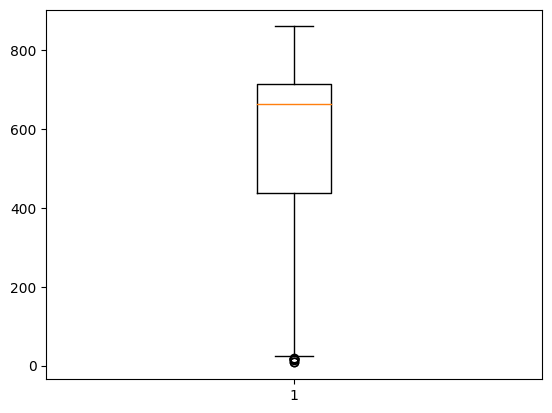

In [220]:
plt.boxplot(ff['DC'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa13a02b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa13a3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa13a0370>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa13a29b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa13a35e0>],
 'means': []}

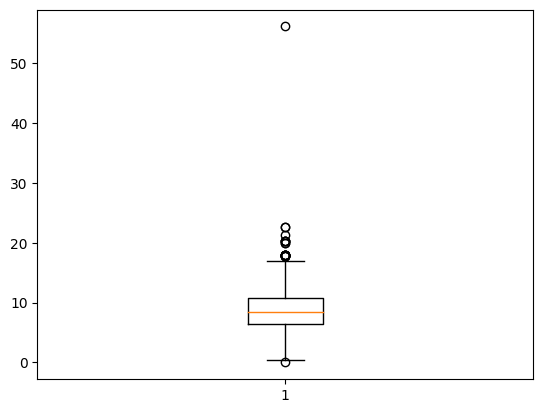

In [221]:
plt.boxplot(ff['ISI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa12375b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa1237e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa1237f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa12343a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa1237130>],
 'means': []}

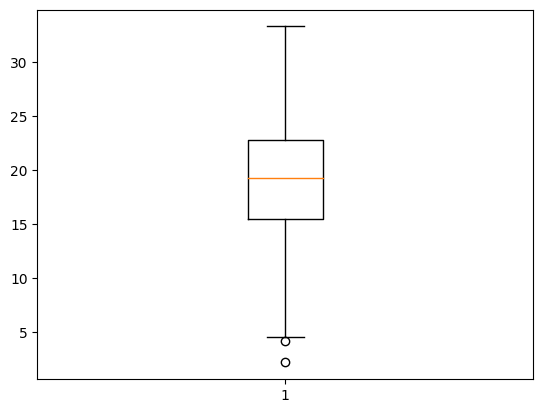

In [222]:
plt.boxplot(ff['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa1190400>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa1191720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa1191000>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa1193b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa1193970>],
 'means': []}

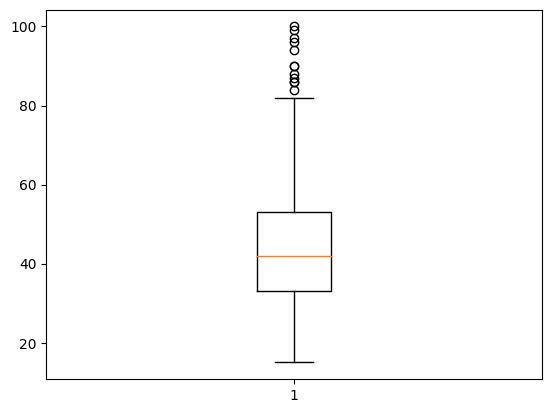

In [223]:
plt.boxplot(ff['RH'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa0fb1720>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa0fb14b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa0fb1300>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa0fb0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa0fb0d00>],
 'means': []}

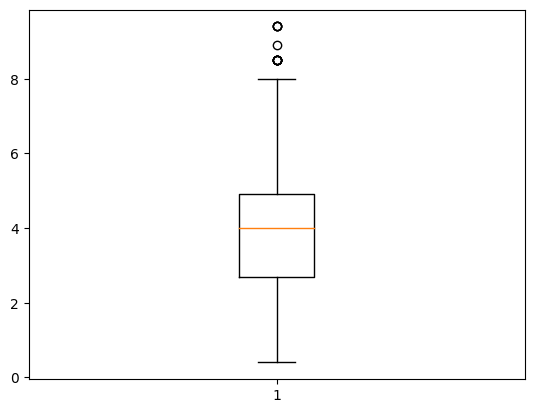

In [224]:
plt.boxplot(ff['wind'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7b6aa130b040>,
 'caps': [<matplotlib.lines.Line2D at 0x7b6aa1377760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b6aa130ada0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b6aa1377070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b6aa1375ed0>],
 'means': []}

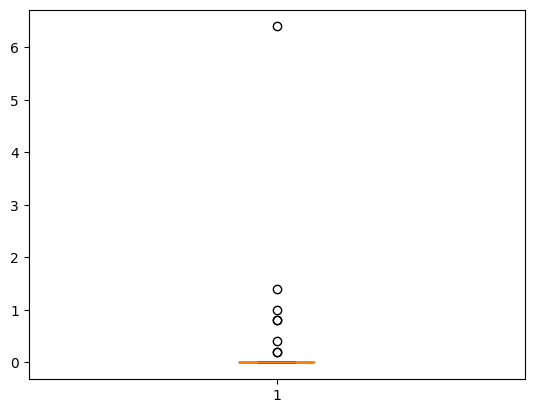

In [225]:
plt.boxplot(ff['rain'])

# Label Encoder

In [226]:
le = LabelEncoder()

In [227]:
ff['size_category'].unique()

array(['small', 'large'], dtype=object)

In [228]:
ff['size_category'] = le.fit_transform(ff['size_category'])

In [229]:
ff.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# Train-Test Split

In [230]:
X = ff.iloc[:,2:30]
y = ff.iloc[:,30]

In [231]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [232]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int64

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [234]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((413, 28), (104, 28), (413,), (104,))

([<matplotlib.patches.Wedge at 0x7b6aa0f45930>,
 [Text(-0.7303966113145594, 0.8225088389678306, '1'),
  Text(0.7303966113145596, -0.8225088389678303, '0')])

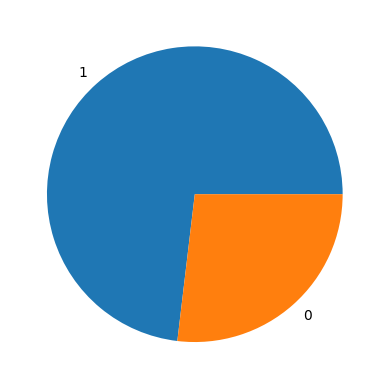

In [235]:
plt.pie(ff['size_category'].value_counts(), labels = ff['size_category'].unique())

# Oversampling

In [236]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [237]:
SMOTE = SMOTETomek(random_state=42)
TM = TomekLinks()
X_train_res, y_train_res = TM.fit_resample(X_train,y_train)
X_train_res, y_train_res = SMOTE.fit_resample(X_train_res, y_train_res)

# Grid Search

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
pgrid = [{'C':[0.4,0.45,0.5,0.55,0.6,0.7,1,2,3,4],'gamma':[0.1,0.01,0.05,0.07,1,0.05,2,3,4]}]

In [240]:
model0 = SVC()

In [241]:
grid = GridSearchCV(model0, param_grid = pgrid, cv = 10)

In [242]:
grid.fit(X_train_res,y_train_res)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 1, 2, 3, 4],
                          'gamma': [0.1, 0.01, 0.05, 0.07, 1, 0.05, 2, 3, 4]}])

In [243]:
best_model = grid.best_estimator_
best_model

SVC(C=2, gamma=0.01)

In [244]:
grid.best_params_

{'C': 2, 'gamma': 0.01}

In [245]:
grid.best_score_

0.8977272727272728

In [246]:
best_model.score(X_test, y_test)

0.8076923076923077

# Model 1

In [247]:
cvclf = SVC(C = 3, gamma = 0.01, kernel = 'rbf')

In [248]:
cvclf.fit(X_train, y_train)

SVC(C=3, gamma=0.01)

In [249]:
traincvclf_pred = cvclf.predict(X_train)

In [250]:
confusion_matrix(y_train, traincvclf_pred)

array([[111,   0],
       [  0, 302]])

In [251]:
print(classification_report(y_train, traincvclf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       302

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413



In [252]:
fprcvclf, tprcvclf, threscvclf = roc_curve(y_train, traincvclf_pred)

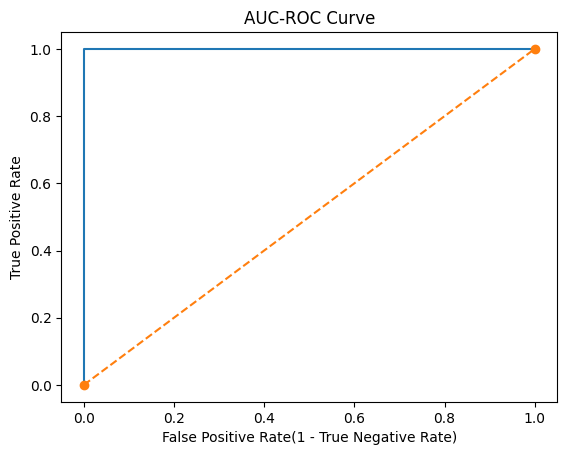

In [253]:
plt.plot(fprcvclf, tprcvclf)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()

# Metrics for Testing data

In [254]:
testcvclf_pred = cvclf.predict(X_test)

In [255]:
confusion_matrix(y_test, testcvclf_pred)

array([[ 5, 23],
       [ 2, 74]])

In [256]:
print(classification_report(y_test, testcvclf_pred))

              precision    recall  f1-score   support

           0       0.71      0.18      0.29        28
           1       0.76      0.97      0.86        76

    accuracy                           0.76       104
   macro avg       0.74      0.58      0.57       104
weighted avg       0.75      0.76      0.70       104



In [257]:
fprcvclf1, tprcvclf1, threscvclf1 = roc_curve(y_test, testcvclf_pred)

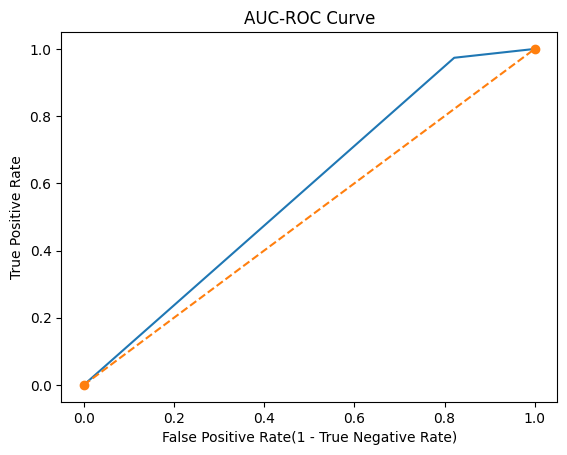

In [258]:
plt.plot(fprcvclf1, tprcvclf1)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()

# Model 2 (kernel = polynomial)

In [259]:
cvclf2 = SVC(C = 3, gamma = 0.01, kernel = 'poly')

In [260]:
cvclf2.fit(X_train, y_train)

SVC(C=3, gamma=0.01, kernel='poly')

# Metrics for Testing data

In [261]:
testcvclf_pred2 = cvclf2.predict(X_test)

In [262]:
confusion_matrix(y_test, testcvclf_pred2)

array([[25,  3],
       [ 1, 75]])

In [263]:
print(classification_report(y_test, testcvclf_pred2))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.96      0.99      0.97        76

    accuracy                           0.96       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.96      0.96      0.96       104



In [264]:
fprcvclf2, tprcvclf2, threscvclf2 = roc_curve(y_test, testcvclf_pred2)

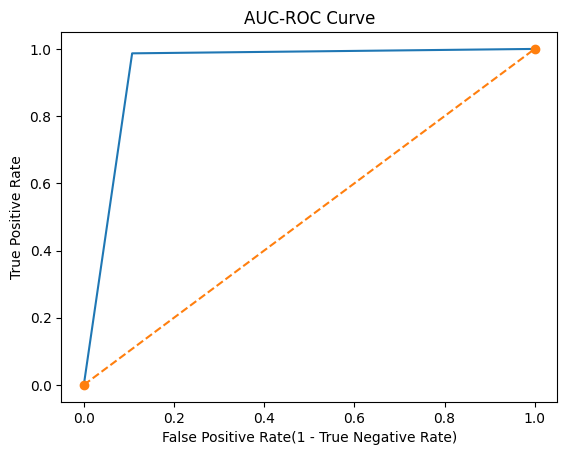

In [265]:
plt.plot(fprcvclf2, tprcvclf2)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()

# SVM using Ensembling (Bagging Classifier)



In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [267]:
base_model = SVC()

In [268]:
bagging_clf = BaggingClassifier(base_estimator= base_model, n_estimators= 100)

In [269]:
bagging_clf.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=100)

In [270]:
bagg_pred = bagging_clf.predict(X_test)

In [271]:
confusion_matrix(y_test, bagg_pred)

array([[ 8, 20],
       [ 2, 74]])

In [272]:
print(classification_report(y_test, bagg_pred))

              precision    recall  f1-score   support

           0       0.80      0.29      0.42        28
           1       0.79      0.97      0.87        76

    accuracy                           0.79       104
   macro avg       0.79      0.63      0.65       104
weighted avg       0.79      0.79      0.75       104



In [273]:
bagg_fpr, bagg_tpr, bagg_thres = roc_curve(y_test, bagg_pred)

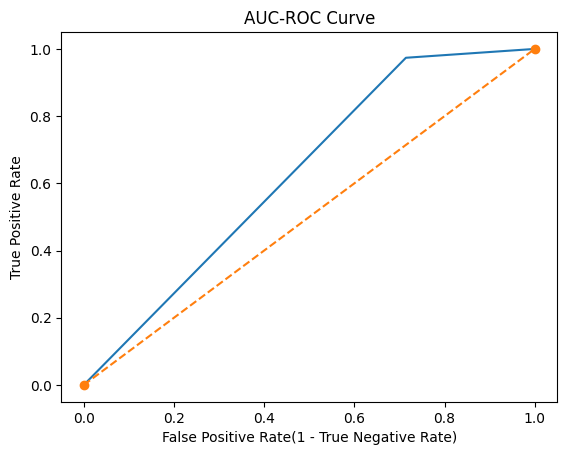

In [274]:
plt.plot(bagg_fpr, bagg_tpr)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()